# Perceptron

## Contents

* Introduction
* Algorithm
* Application on Dataset

   * Prepare Data
   
   * Perceptron Class
   
* Error Analysis

## Introduction

The Perceptron is one of the simplest neural network models, inspired by the workings of human neurons. It receives a set of input values and produces a binary output that indicates whether the input belongs to a category or not.

The perceptron consists of multiple input nodes and one output node. Each input node is associated with a weight that is used to adjust the relative importance of the input values. The output of the perceptron is calculated by multiplying all inputs by their corresponding weights, then summing the results and passing them into an activation function (usually a step function). The activation function converts the output values to binary, which is then used as the final output of the perceptron.

Perceptrons are typically used to solve binary classification problems, such as dividing input data into two categories. A perceptron can learn a set of weights to correctly classify data given an input. Its learning process is based on feedback from errors, and when the perceptron makes an incorrect prediction, it adjusts the weights according to the magnitude of the error in order to classify the data more accurately.

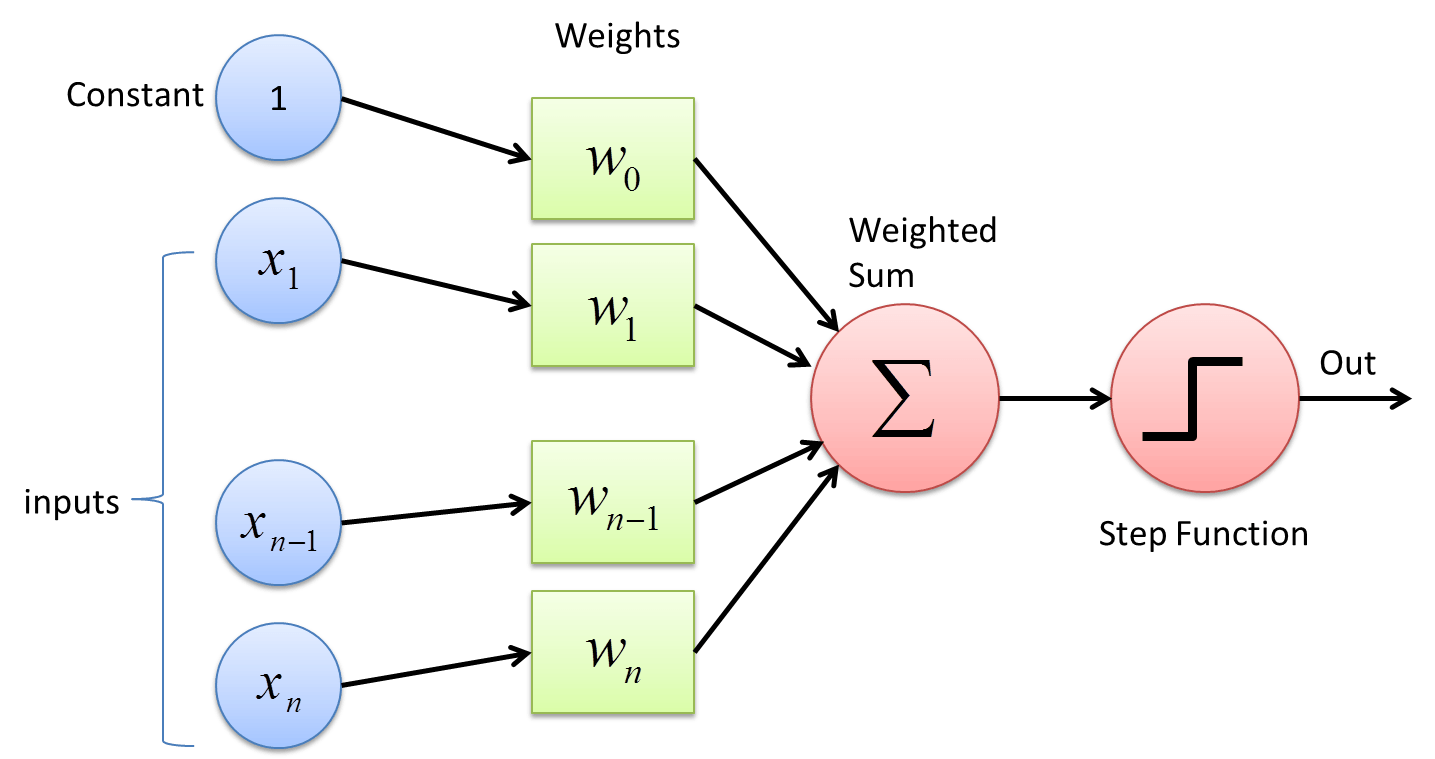

## Algorithm

The perceptron is a single neuron model with the sign activation function:

Let $x$ denotes the input with constant, $f(x)$ denotes the output:

$f(x)$ = 1 if $\Sigma_{i=0}^{i=n}x_{i}w_{i} > 0$ 

$f(x)$ = -1  if $\Sigma_{i=0}^{i=n}x_{i}w_{i} < 0$ 

$w$ is a vector of real-valued weights.




## Advantages 

Faster training: The perceptron has only one output node, so it is usually faster to train.

Highly interpretable: Since the perceptron has only a small number of weights and bias parameters, its decision process is relatively simple and easy to interpret.

Suitable for large-scale data: The perceptron performs better when dealing with large amounts of data and can be well adapted to large-scale data sets.

## Disadvantages

Large limitation: The perceptron can only solve linearly separable problems and cannot handle nonlinear problems, so it does not perform as well as other neural network models in certain application scenarios.

Cannot learn complex patterns: The perceptron can only learn simple patterns, so it cannot learn complex patterns, such as high-level features in images.

Sensitive to initialization values: The performance of a perceptron depends heavily on its initialization values, and different initialization values may lead to different performance.

## Application on Dataset

In [5]:
# Import all the necessary libraries
import numpy as np 
import pandas as pd 
import random

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
## from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Set the Seaborn theme
sns.set_theme()

### Prepare Data

In [148]:
df = pd.read_csv("/Users/liusiling/Desktop/semester2/577/diabetes.csv") 
df.shape

(768, 9)

In [149]:
df = df.dropna(axis=0)

In [150]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


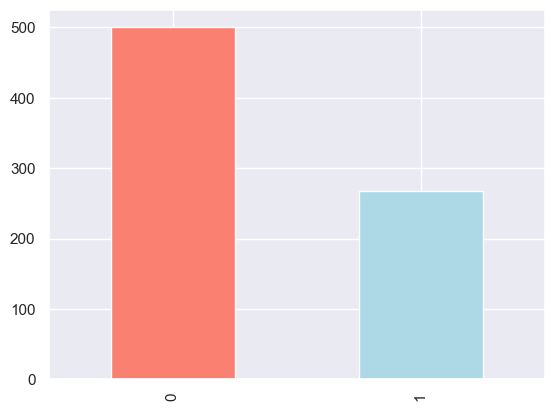

In [157]:
# Plot the value counts with a bar graph
df.Outcome.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

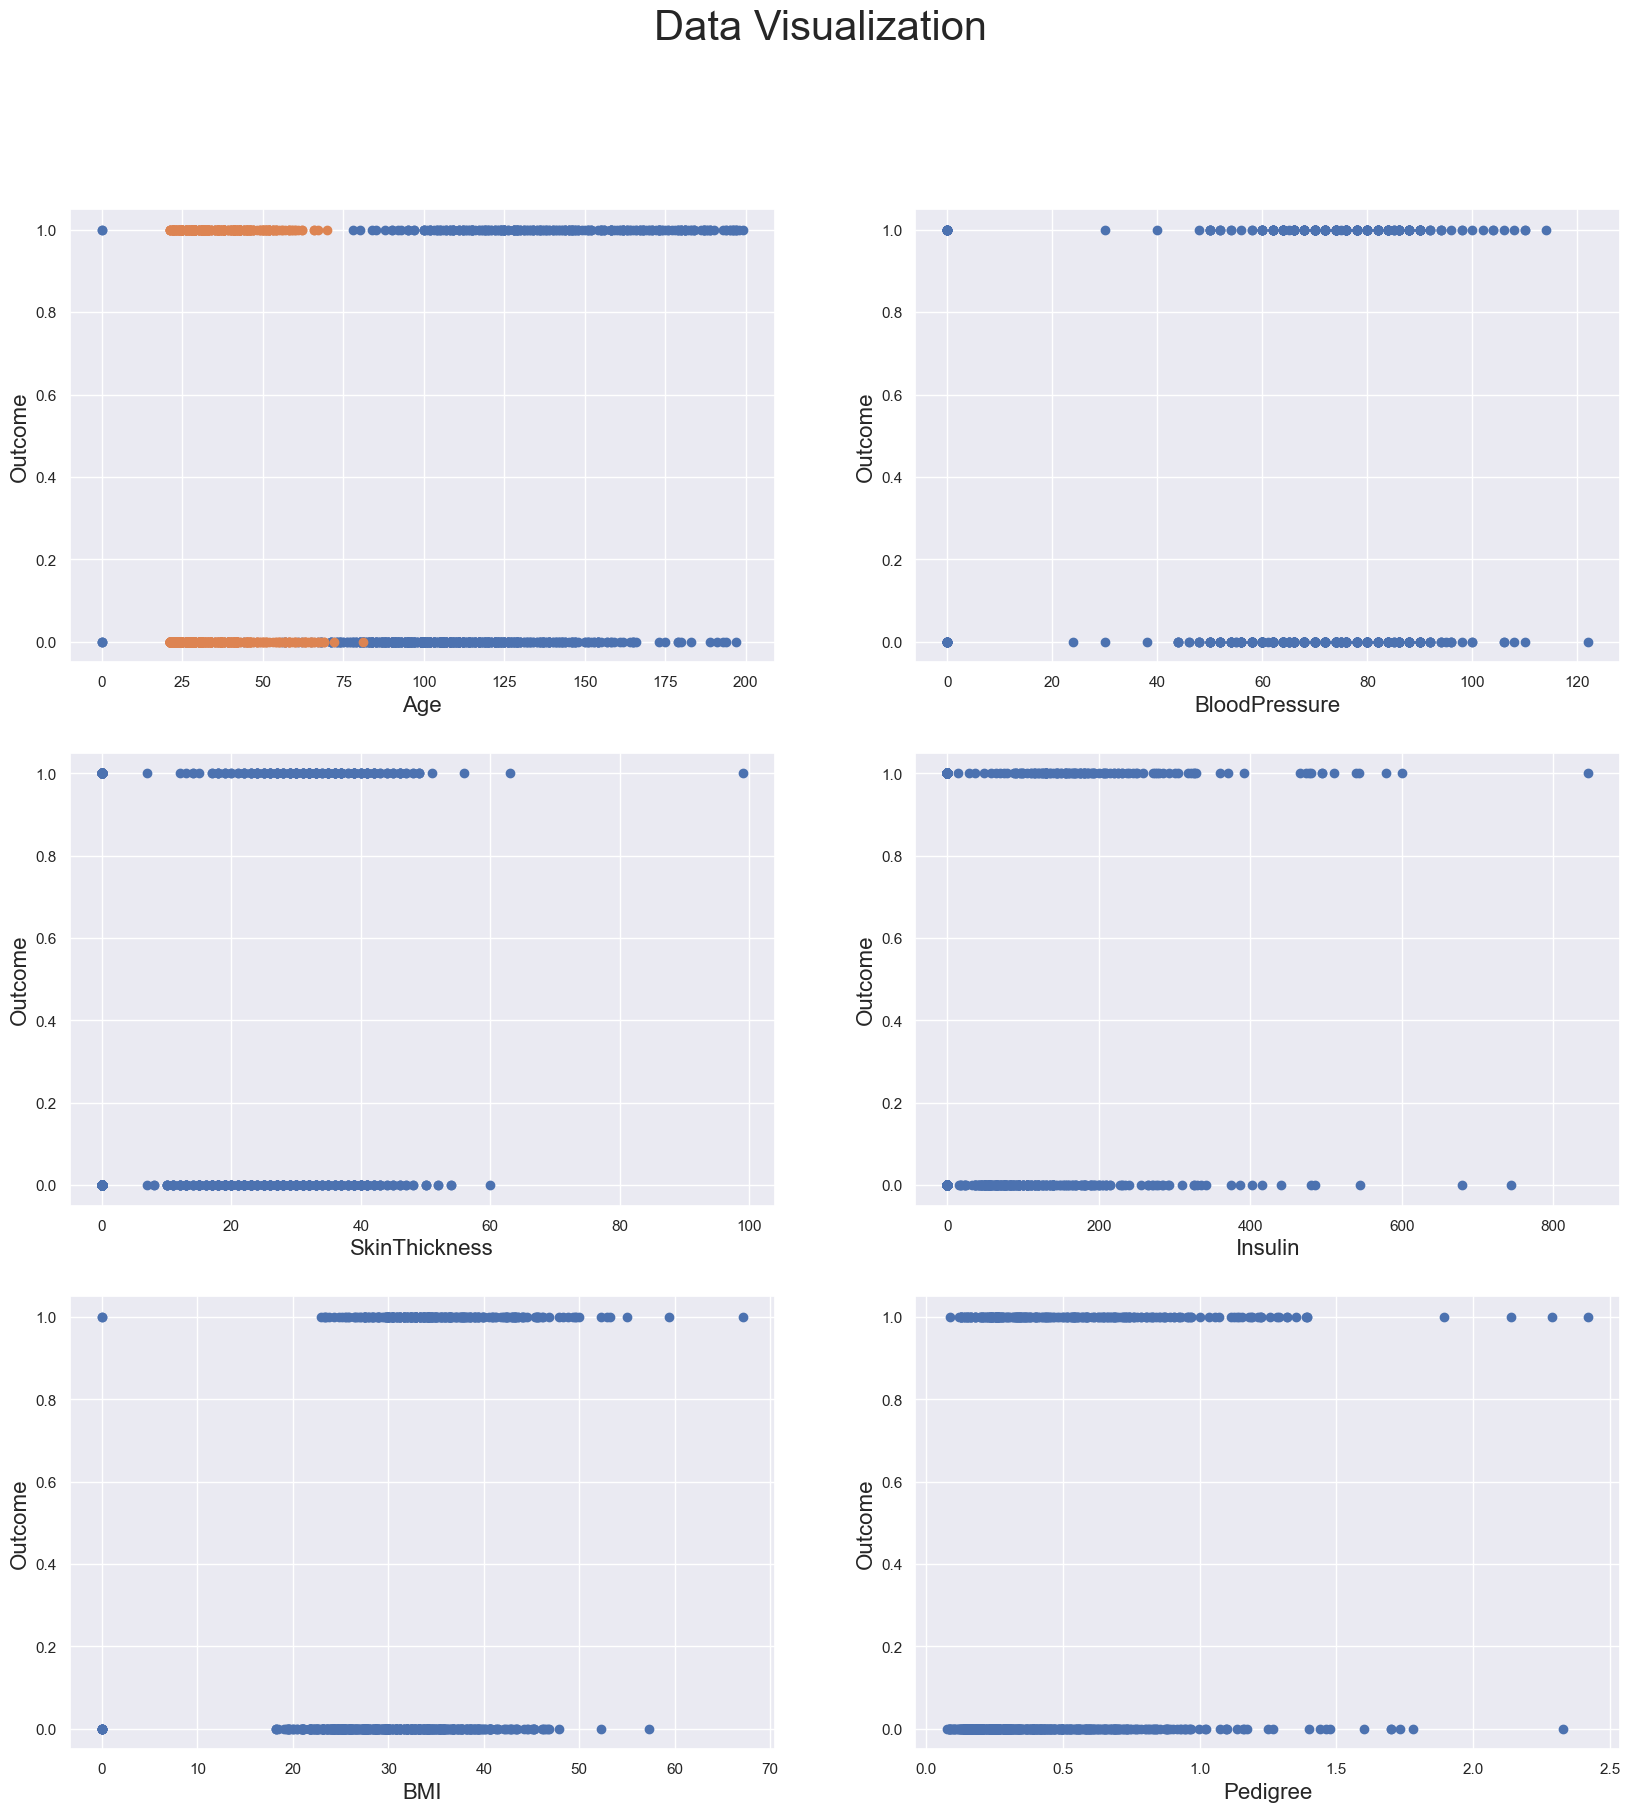

In [158]:
fig, axs = plt.subplots(3,2)

fig.set_size_inches(20, 20)


fig.suptitle("Data Visualization", fontsize = 30)
label = df.columns[-1]
i = 0
j = 0
# Plot each feature against the outcome
for feature in df.columns[1:-1]:
    axs[i,j].scatter(df[feature], df[label])
    axs[i,j].set_xlabel(feature, fontsize = 16)
    axs[i,j].set_ylabel(label, fontsize = 16)
    j += 1
    if j > 1:
        j = 0
        i += 1
    if i > 2:
        i = 0



In [151]:
X = df[df.drop(['Outcome'], axis = 1).columns].values

y = df['Outcome']

### Perceptron Class

In [136]:
class Perceptron(object):
    def __init__(self, epochs = 400, eta = .1):
        self.eta = eta
        self.epochs = epochs
        
    def fit(self, X, y):
        self.errors = []
        self.w = np.random.rand(1 + X.shape[1])
        
        for _ in range(self.epochs):
            errors = 0
            
            for x, target in zip(X, y):
                update = self.eta * (self.predict(x) - target)
                self.w[:-1] -= update*x
                self.w[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors.append(errors)
            
        return self
    
    def pinput(self, X):
        return np.dot(X, self.w[:-1]) + self.w[-1]
    
    def predict(self, X):
        return np.where(self.pinput(X) >= 0.0, 1, -1)

In [152]:
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 40)

In [153]:
model = Perceptron()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

We can look at the error plot:

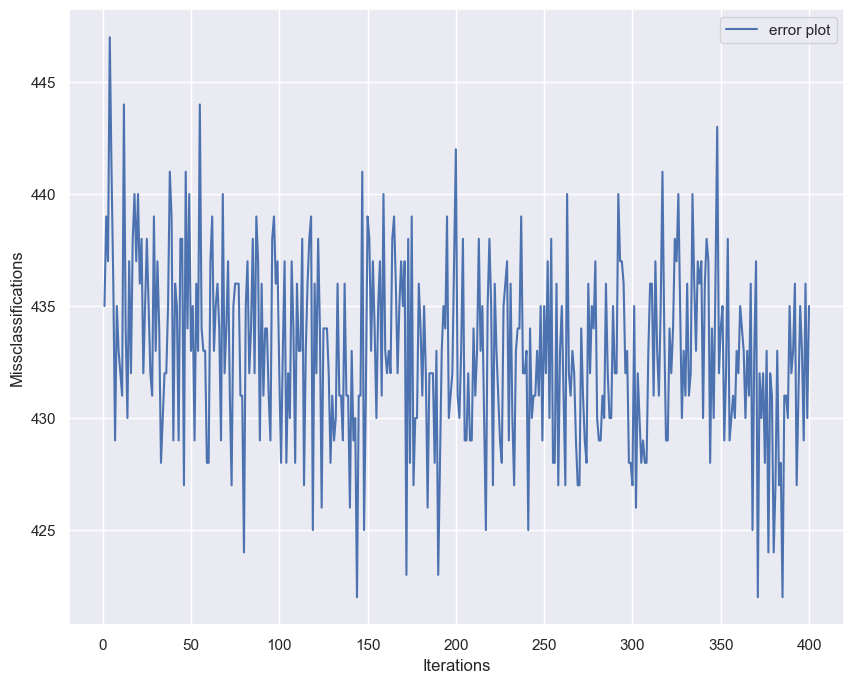

In [161]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(model.errors)+1), model.errors,
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

From this plot, we can see as the number of iterations increase, the error decrease slowly, but it is a not steady trend. 

In [162]:
print(f'Test accuracy score = {accuracy_score(y_test, y_hat)}')

Test accuracy score = 0.3541666666666667


## Error Analysis

In [163]:
# MSE
MSE = (1/X_test.shape[0])*sum((y_hat - y_test)**2)
print(f"Mean Squared Error: {np.round(MSE,2)}")

# SSE
SSE = sum((y_hat - y_test)**2)
print(f"Sum Squared Error: {np.round(SSE,2)}")

# SST
SST = sum((y_test - np.mean(y_test))**2)
print(f"Sum Squared Total: {np.round(SST,2)}")

# R_2
R_2 = 1-SSE/SST
print(f"R^2: {np.round(R_2,2)}")

Mean Squared Error: 0.72
Sum Squared Error: 139
Sum Squared Total: 45.24
R^2: -2.07
